<a href="https://colab.research.google.com/github/devesh1702/CodeClause_Stock_market_Prediction/blob/main/CodeClause_Stock_market_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib. dates as mandates

In [2]:
#Get the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.shape

(2035, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<ipython-input-8-8fdecfb018eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True, ax=ax)


<Axes: >

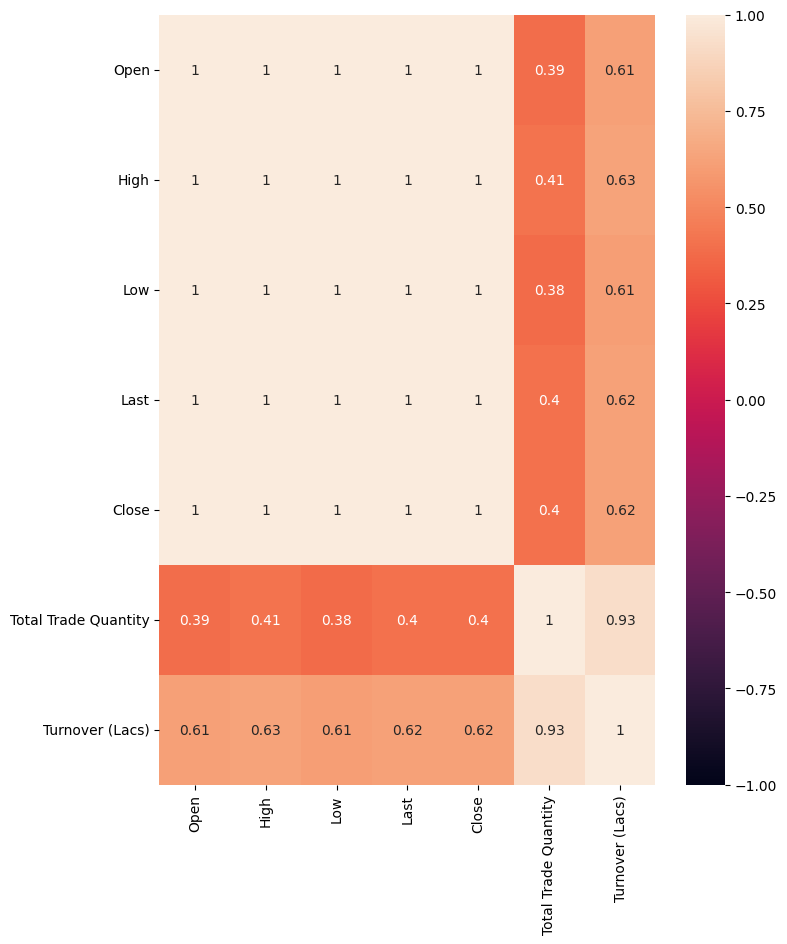

In [8]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True, ax=ax)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Total Trade Quantity'}>],
       [<Axes: title={'center': 'Turnover (Lacs)'}>, <Axes: >, <Axes: >]],
      dtype=object)

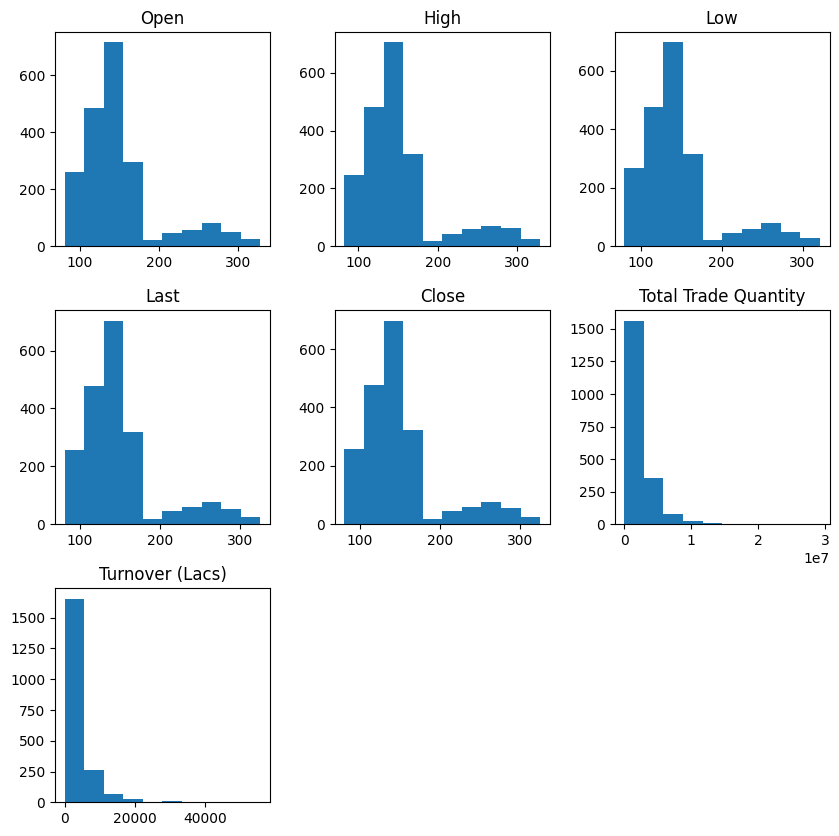

In [9]:
df.hist(figsize=(10,10),grid=False)

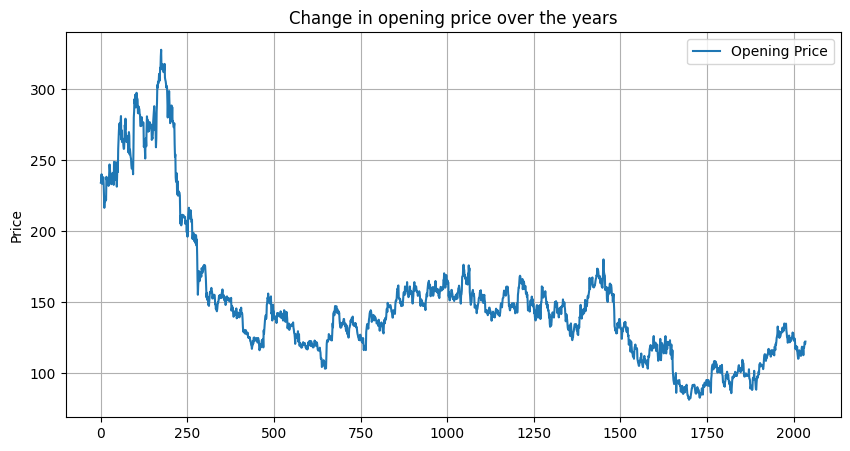

In [10]:
plt.figure(figsize=(8,5))
df['Open'].plot(kind='line',figsize=(10,5),label="Opening Price")
plt.ylabel("Price")
plt.legend()
plt.title("Change in opening price over the years")
plt.grid()

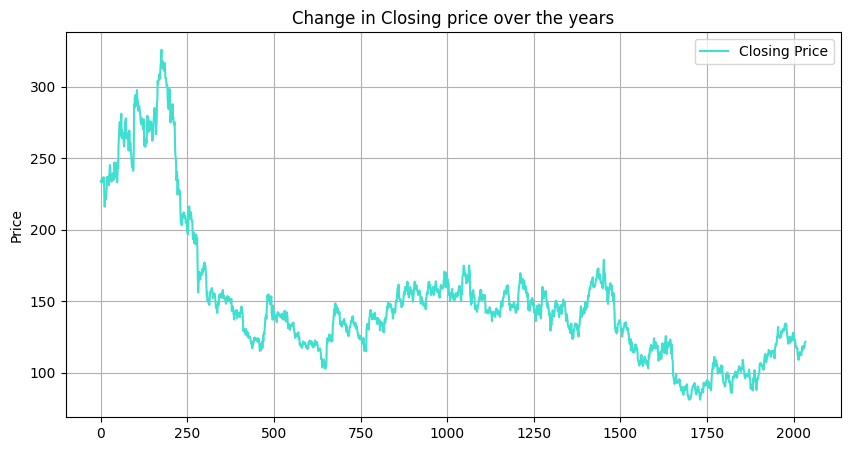

In [11]:
plt.figure(figsize=(8,5))
df['Close'].plot(kind='line',figsize=(10,5),color='turquoise',label="Closing Price")
plt.ylabel("Price")
plt.legend()
plt.title("Change in Closing price over the years")
plt.grid()

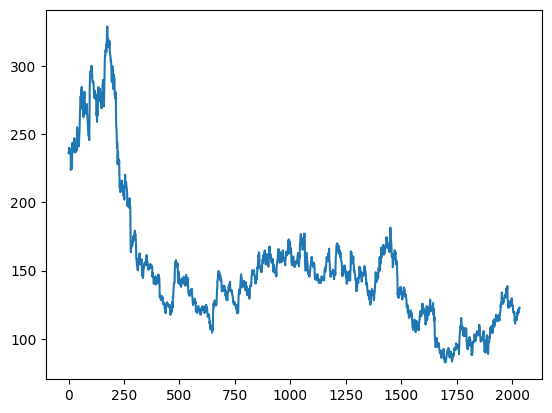

In [12]:
high_df =df.reset_index()['High']
plt.plot(high_df)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range = (0,1))
high_df = scaler.fit_transform(np.array(high_df).reshape(-1,1))

In [15]:
high_df

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [16]:
high_df.shape

(2035, 1)

In [17]:
training_size = int(len(high_df) * 0.75)
test_size = len(high_df) - training_size
train_data,test_data = high_df[0:training_size,:], high_df[training_size:len(high_df),:1]

In [18]:
training_size, test_size

(1526, 509)

In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [21]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1425, 100, 1)
(1425,)
(408, 100, 1)
(408,)


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [24]:
from keras. utils.vis_utils import plot_model

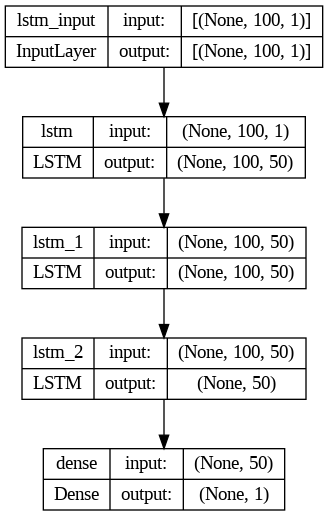

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
plot_model(model, show_shapes=True, show_layer_names=True)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Model Training
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 9s 215ms/step - loss: 0.0209 - val_loss: 0.0068
Epoch 2/100
23/23 [==============================] - 4s 193ms/step - loss: 0.0029 - val_loss: 7.0525e-04
Epoch 3/100
23/23 [==============================] - 3s 141ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/100
23/23 [==============================] - 4s 174ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 5/100
23/23 [==============================] - 3s 144ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 4s 172ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/100
23/23 [==============================] - 3s 142ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
23/23 [==============================] - 3s 144ms/step - loss: 0.0011 - val_loss: 9.9439e-04
Epoch 10/100
23/23 [==============================] - 3s 144ms/step - loss: 0.0010 

In [28]:
#LSTM Prediction
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 0s 33ms/step


In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error

In [31]:
math.sqrt(mean_squared_error(y_train, train_predict))

166.92458937966884

In [32]:
math.sqrt(mean_squared_error(y_test, test_predict))

108.79597370564954

In [33]:
look_back = 100
trainPredictPlot = np.empty_like(high_df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(high_df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(high_df) - 1, :] = test_predict

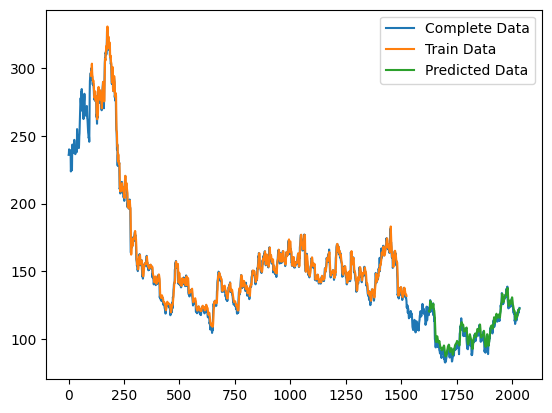

In [34]:
# plot Predictions
plt.plot(scaler.inverse_transform(high_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Complete Data', 'Train Data', 'Predicted Data'])
plt.show()

In [35]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [36]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.16609034]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

In [38]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [39]:
day_new.shape

(100,)

In [40]:
day_pred.shape

(28,)

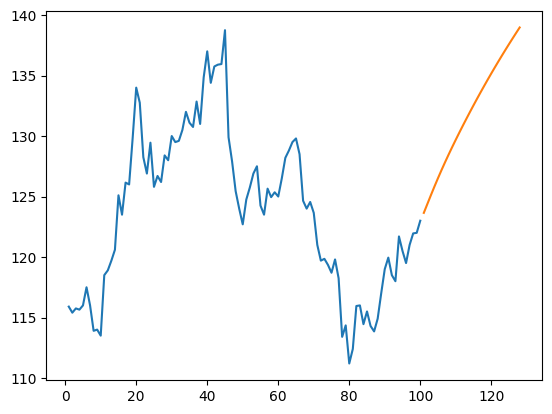

In [41]:
plt.plot(day_new, scaler.inverse_transform(high_df[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

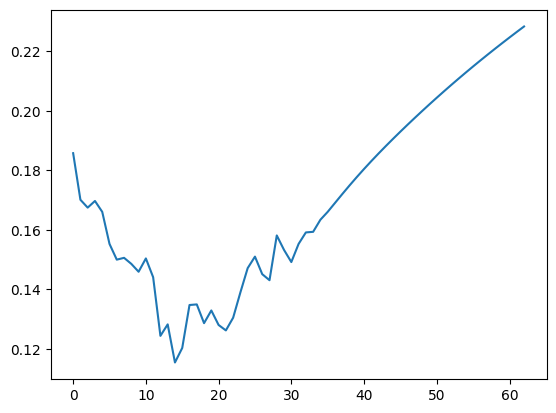

In [42]:
data_new = high_df.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

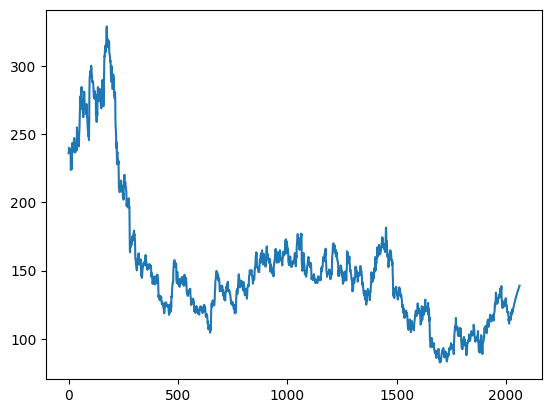

In [43]:
data_new =scaler.inverse_transform(data_new).tolist()
plt.plot(data_new)

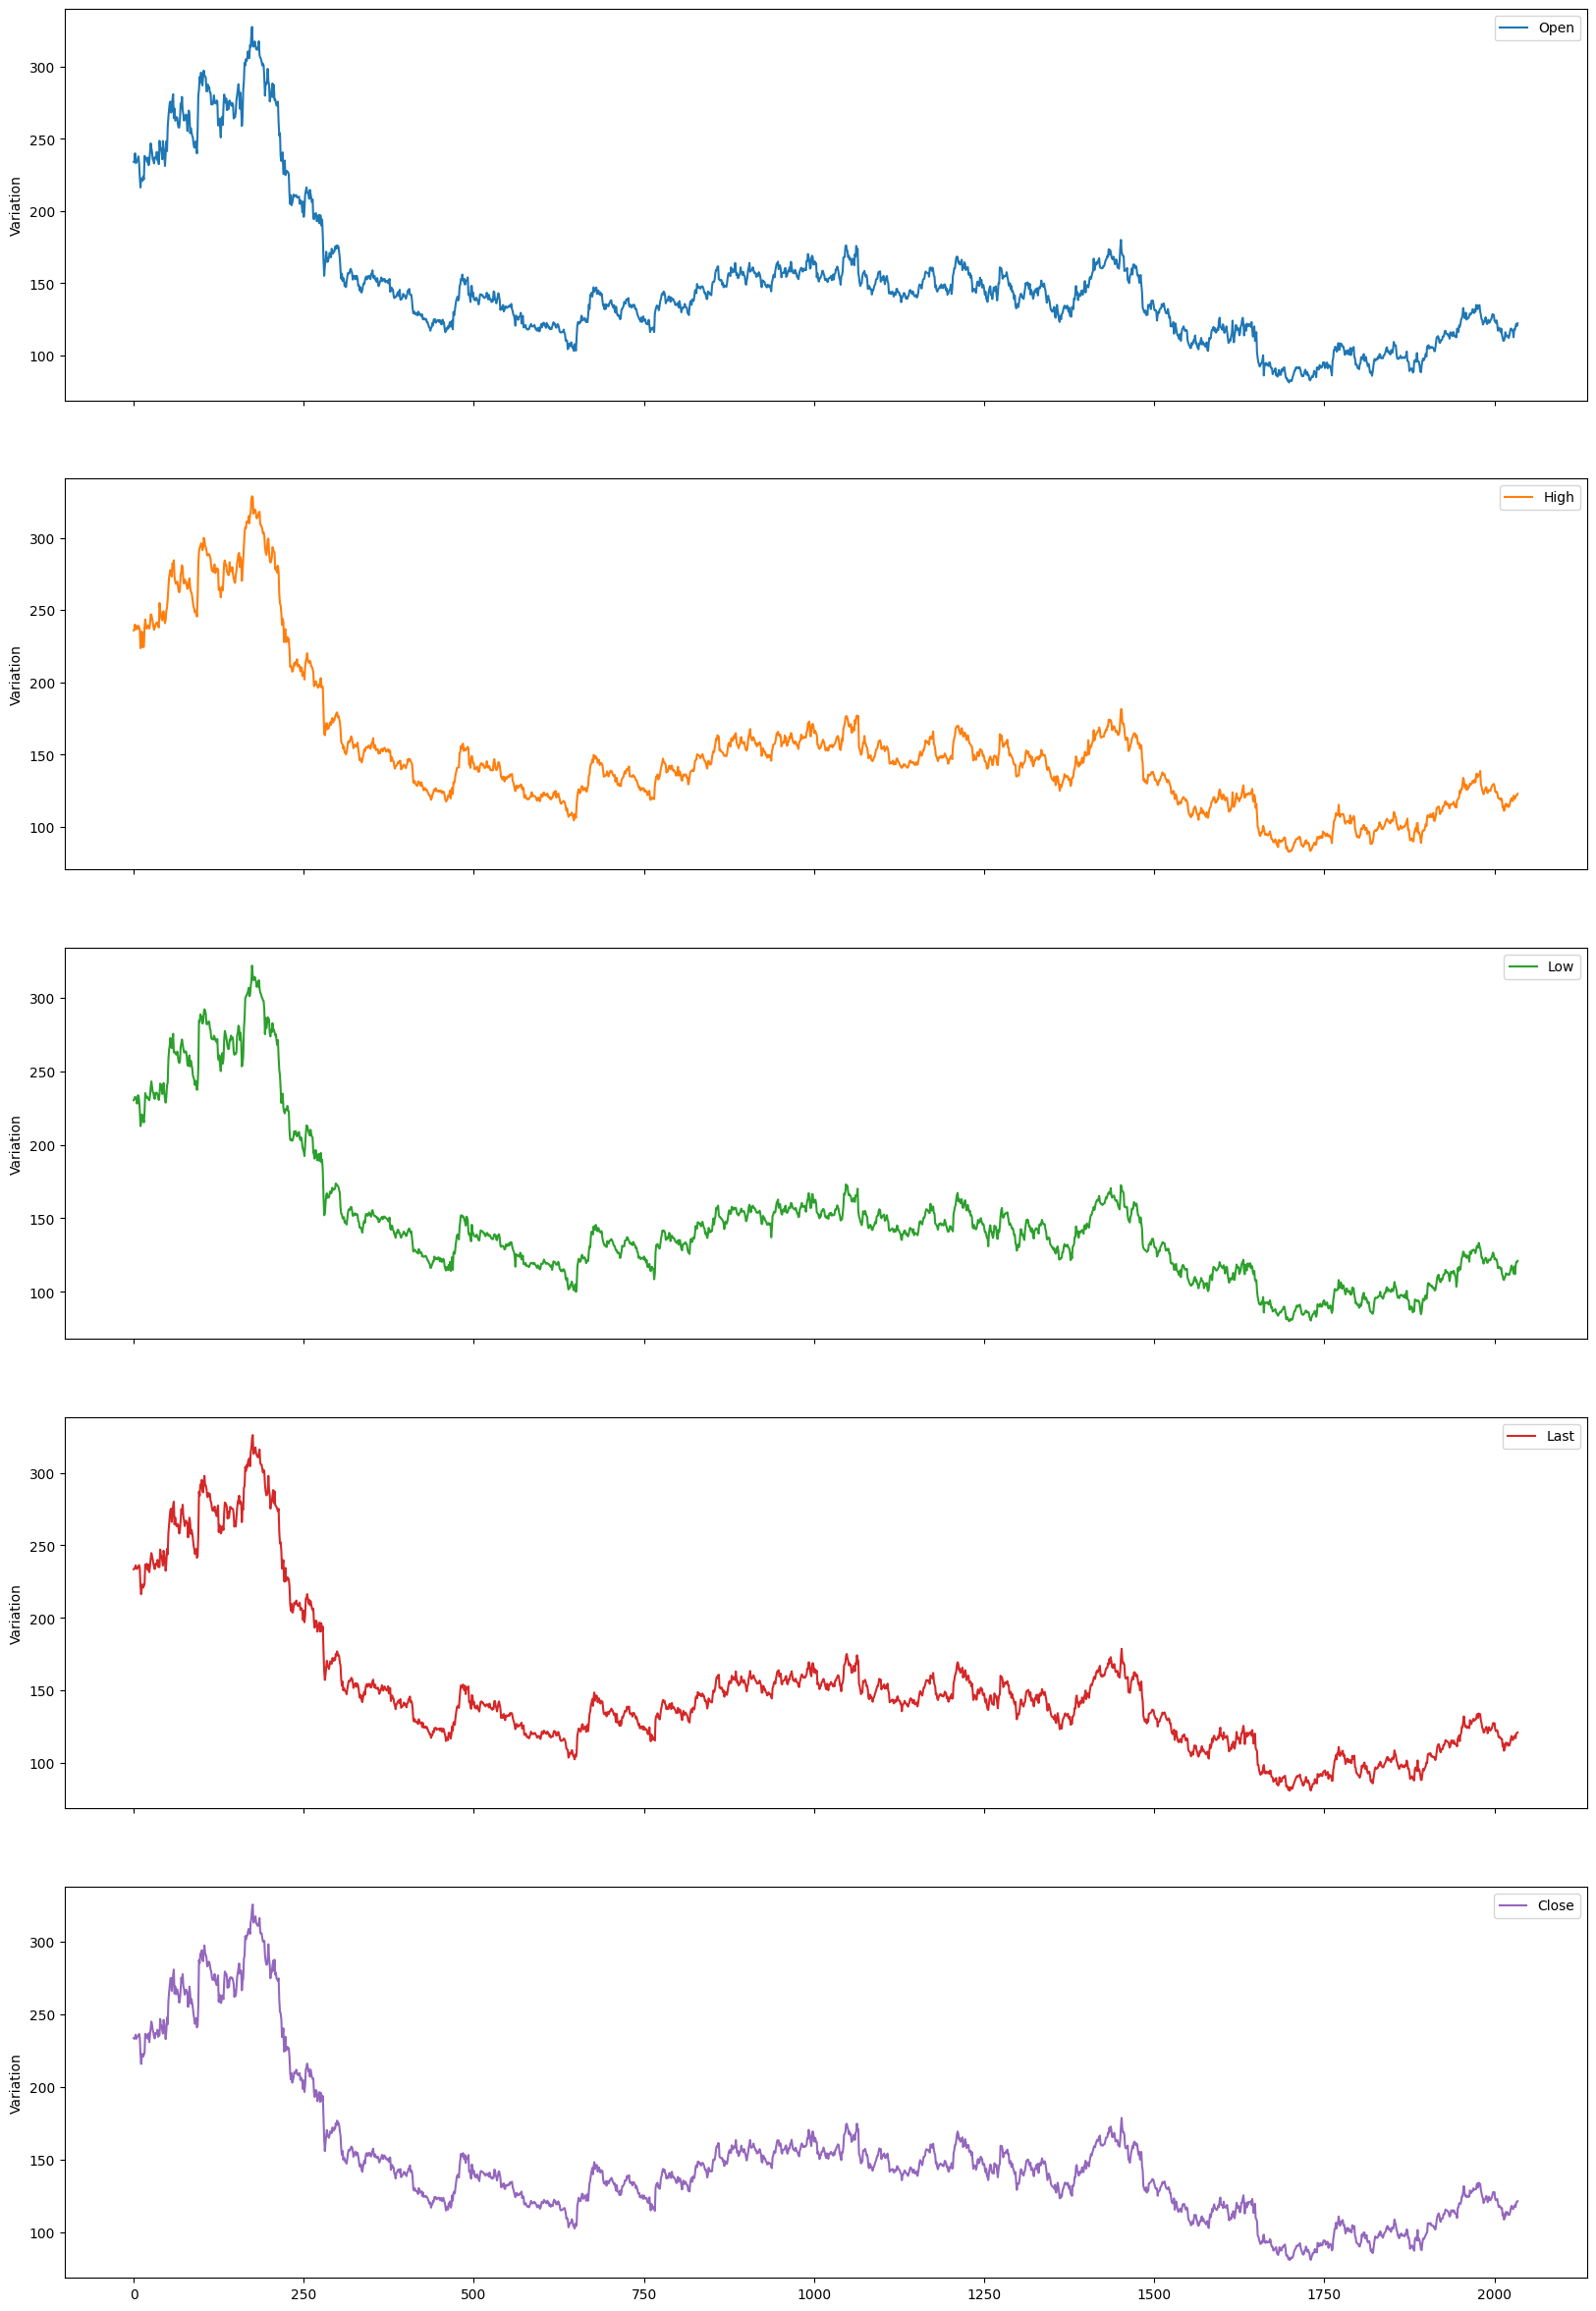

In [44]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')